# San Francisco Salaries

In [2]:
import pandas as pd

### Erstelle aus salaries.csv einen DataFrame

In [4]:
sal = pd.read_csv("./salaries.csv", na_values=['Not Provided'])

C:\Users\jackie35er\AppData\Local\Temp\ipykernel_332\2595405409.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  sal = pd.read_csv("./salaries.csv", na_values=['Not Provided'])


** Empfohlen: `head()` **

In [5]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Wie viele Observations gibt es?

In [6]:
sal.count()

Id                  148654
EmployeeName        148652
JobTitle            148654
BasePay             148045
OvertimePay         148650
OtherPay            148650
Benefits            112491
TotalPay            148654
TotalPayBenefits    148654
Year                148654
Notes                    0
Agency              148654
Status               38119
dtype: int64

### Was ist das arithmetische Mittel von `BasePay`?
Lösung: `66325.44884050643`

In [14]:
sal.BasePay.mean()

66325.44884050643

### Was ist der höchste Geldbetrag, der als `OvertimePay` vorhanden ist?
Lösung: `245131.88`

In [15]:
sal.OvertimePay.max()

245131.88

### Welchen Job hat JOSEPH DRISCOLL? (**Nicht** Joseph Driscoll).
Lösung:
```
CAPTAIN, FIRE SUPPRESSION
```

In [29]:
sal.query('EmployeeName == "JOSEPH DRISCOLL"' )['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

### Was ist das Gesamtgehalt von JOSEPH DRISCOLL?
Lösung:
```
270324.91
```

In [32]:
sal.query('EmployeeName == "JOSEPH DRISCOLL"' )['TotalPay']

24    270324.91
Name: TotalPay, dtype: float64

### Wie lautet der Name der bestverdienensten Person?
Lösung: `NATHANIEL FORD`

In [35]:
sal.query("TotalPay == TotalPay.max()")['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

### Wie lautet der Name der am schlechtest bezahlten Person?
Lösung: `Joe Lopez`

In [36]:
sal.query("TotalPay == TotalPay.min()")['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

### Ermittle für die Jahre 2012-2014 den arithmetischen Mittelwert des `BasePay`s aller Personen.
Lösung:
```
Year
2012    65436.406857
2013    69630.030216
2014    66564.421924
```


In [47]:
sal.groupby(by ='Year').median()["BasePay"].tail(3)

Year
2012    64017.37
2013    67669.00
2014    65055.00
Name: BasePay, dtype: float64

### Wie viele unterschiedliche Jobs gibt es?
Lösung: `2159`

In [53]:
sal.JobTitle.unique().size

2159

### Welche sind die Top 5 häufigsten Jobs und wie viele gibt es davon jeweils?
Lösung:
```
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64
```


In [57]:
sal.groupby(by=['JobTitle'])['JobTitle'].count().sort_values(ascending=False).head(5)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

### Wie viele Jobs gibt es, die 2013 nur eine Person ausübte?
Lösung: `202`

In [76]:
temp = sal.query('Year == 2013').groupby('JobTitle').size()
temp[temp == 1].size

202

### Wie viele läute haben `'chief'` (caseinsensitive) im Jobnamen?
Lösung: `627`

In [77]:
len(sal[sal['JobTitle'].str.contains("chief", case=False)])

627

<AxesSubplot:xlabel='Year', ylabel='TotalPay'>

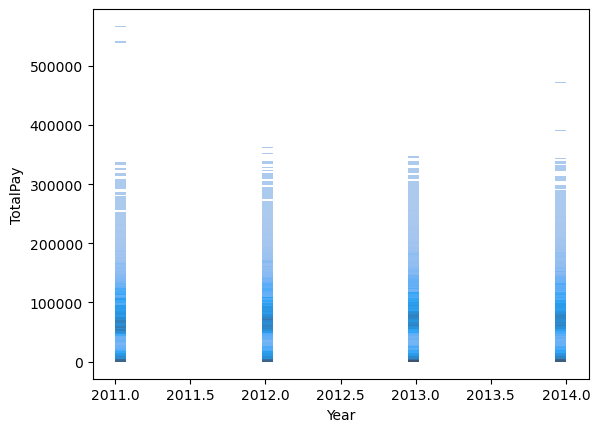

In [92]:
### Erstelle ein Histogramm
import seaborn as sns
sns.histplot(data=sal, x='Year', y='TotalPay')
